In [1]:
# INTRODUCTION TO TENSORFLOW

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import warnings
import tensorflow as tf
from keras import layers, Sequential
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [3]:
warnings.filterwarnings('ignore')

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(y_train)

60000

In [7]:
len(X_test)

10000

In [8]:
len(y_test)

10000

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

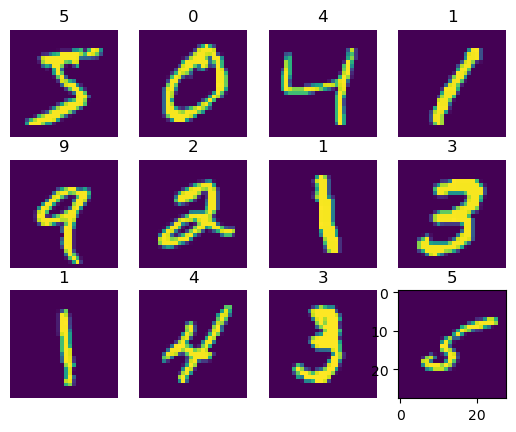

In [11]:
def showImg(index):
    plt.axis('off')
    ax = plt.subplot(3, 4, index + 1)
    plt.imshow(X_train[index])
    plt.title(y_train[index])

for i in range(12):
    showImg(i)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train[0].shape

(28, 28)

In [14]:
X1 = X_train.reshape(-1, 28*28)

In [15]:
X1.shape

(60000, 784)

In [16]:
X_train.shape

(60000, 28, 28)

# SIMPLE ANN WITHOUT FLATTEN LAYER

In [17]:
# SIMPLE ANN WITHOUT FLATTEN LAYER
model = Sequential([
    layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 784), y_train, epochs=20)



Epoch 1/20


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4671 - accuracy: 0.8786
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9154
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9231
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9259
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9264
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9281
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9282
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9299
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0

In [18]:
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9276


[0.2664310336112976, 0.9276000261306763]

In [19]:
y_pred = model.predict(X_test.reshape(-1, 784))

313/313 [==============================] - 0s 1ms/step


In [20]:
y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(np.argmax(y_pred[i]))

In [21]:
y_true_ = []
for i in range(len(y_test)):
    y_true_.append(y_test[i])

In [22]:
cm = confusion_matrix(y_true_, y_pred_)
cm

array([[ 956,    0,    0,    2,    1,    8,    8,    4,    1,    0],
       [   0, 1117,    3,    2,    0,    2,    4,    2,    5,    0],
       [   5,    9,  929,   15,    8,    4,   13,   10,   35,    4],
       [   3,    0,   18,  918,    0,   30,    2,   11,   23,    5],
       [   1,    1,    6,    3,  913,    0,    8,    8,    8,   34],
       [   8,    2,    1,   26,    8,  793,   14,    9,   28,    3],
       [  11,    3,    8,    1,    7,   16,  909,    1,    2,    0],
       [   1,    7,   22,    2,    5,    1,    0,  962,    1,   27],
       [   7,   11,    6,   20,    9,   33,    7,   11,  859,   11],
       [   9,    8,    1,    8,   22,    8,    0,   26,    7,  920]],
      dtype=int64)

Text(45.722222222222214, 0.5, 'Truth')

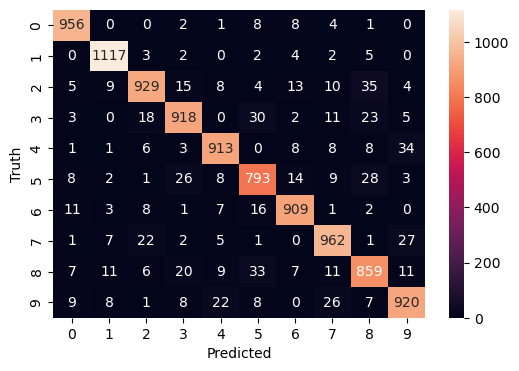

In [23]:
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [24]:
y_pred_ = [(np.argmax(i)) for i in y_pred]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    2,    1,    8,    8,    4,    1,    0],
       [   0, 1117,    3,    2,    0,    2,    4,    2,    5,    0],
       [   5,    9,  929,   15,    8,    4,   13,   10,   35,    4],
       [   3,    0,   18,  918,    0,   30,    2,   11,   23,    5],
       [   1,    1,    6,    3,  913,    0,    8,    8,    8,   34],
       [   8,    2,    1,   26,    8,  793,   14,    9,   28,    3],
       [  11,    3,    8,    1,    7,   16,  909,    1,    2,    0],
       [   1,    7,   22,    2,    5,    1,    0,  962,    1,   27],
       [   7,   11,    6,   20,    9,   33,    7,   11,  859,   11],
       [   9,    8,    1,    8,   22,    8,    0,   26,    7,  920]])>

Text(45.722222222222214, 0.5, 'Truth')

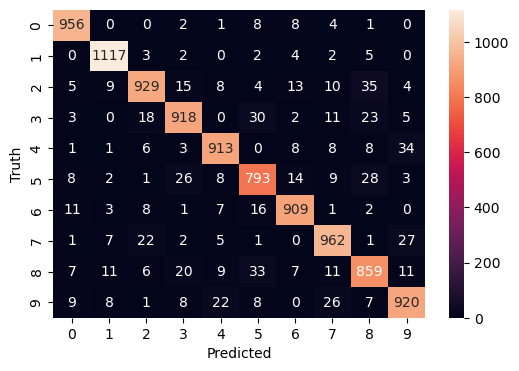

In [26]:
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

# SIMPLE ANN WITH HIDDEN LAYER WITHOUT FLATTEN LAYER

In [27]:
# SIMPLE ANN WITH HIDDEN LAYER WITHOUT FLATTEN LAYER
model = Sequential([
    layers.Dense(100, input_shape=(784,), activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 784), y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2727 - accuracy: 0.9223
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1235 - accuracy: 0.9630
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0857 - accuracy: 0.9740
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9843
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0410 - accuracy: 0.9873
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9899
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.018

In [28]:
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1271 - accuracy: 0.9735


[0.12707917392253876, 0.9735000133514404]

In [29]:
y_pred = model.predict(X_test.reshape(-1, 784))

313/313 [==============================] - 1s 2ms/step


In [30]:
y_pred_ = [(np.argmax(i)) for i in y_pred]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    1,    1,    0,    1,    2,    0],
       [   0, 1102,    3,    2,    0,    0,    5,    1,   22,    0],
       [   3,    1, 1011,    1,    4,    1,    2,    1,    8,    0],
       [   1,    0,    8,  988,    1,    1,    0,    2,    6,    3],
       [   2,    0,    3,    1,  967,    1,    2,    3,    1,    2],
       [   4,    0,    0,   20,    1,  846,    6,    2,   10,    3],
       [   9,    2,    2,    1,    7,    2,  934,    0,    1,    0],
       [   0,    1,   13,    2,    3,    1,    0,  989,   11,    8],
       [   4,    0,    4,    4,    5,    0,    2,    0,  954,    1],
       [   5,    2,    0,    3,   14,    3,    0,    5,   11,  966]])>

Text(45.722222222222214, 0.5, 'Truth')

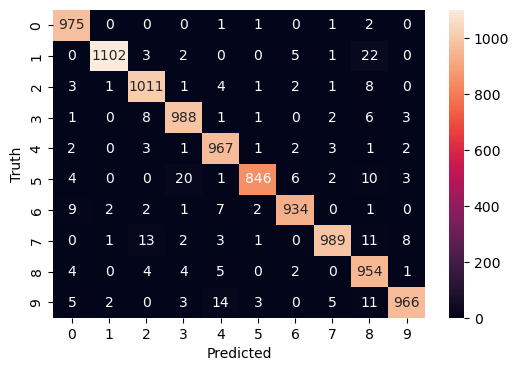

In [32]:
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

# SIMPLE ANN WITH HIDDEN LAYER WITH FLATTEN LAYER

In [33]:
# SIMPLE ANN WITH HIDDEN LAYER WITH FLATTEN LAYER
model = Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2751 - accuracy: 0.9211
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1233 - accuracy: 0.9635
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9740
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0647 - accuracy: 0.9804
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0341 - accuracy: 0.9891
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9932
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9760


[0.10989731550216675, 0.9760000109672546]

In [35]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
y_pred_ = [(np.argmax(i)) for i in y_pred]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    1,    0,    1,    2,    1,    1,    0],
       [   0, 1122,    2,    4,    0,    1,    1,    1,    3,    1],
       [   5,    1, 1007,    3,    2,    0,    2,    4,    7,    1],
       [   0,    0,    2,  995,    0,    6,    0,    3,    0,    4],
       [   2,    0,    3,    1,  958,    0,    5,    2,    2,    9],
       [   2,    0,    0,   16,    2,  859,    5,    2,    5,    1],
       [   5,    1,    2,    1,    2,    2,  942,    0,    3,    0],
       [   0,    5,   12,    3,    2,    0,    0,  997,    1,    8],
       [   7,    1,    3,   13,    5,    3,    3,    4,  931,    4],
       [   2,    3,    0,    9,   11,    2,    0,    4,    2,  976]])>

Text(45.722222222222214, 0.5, 'Truth')

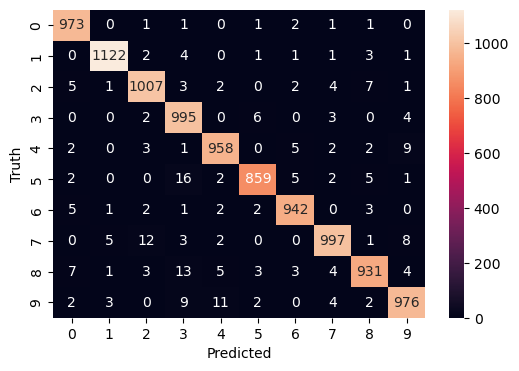

In [38]:
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")